# Question 5

### II.

In [1]:
# load train and test set to dataframe
train <- read.csv(file="Task1C_train.csv", header=TRUE, sep=",")
test <- read.csv(file="Task1C_test.csv", header=TRUE, sep=",")
head(train)

x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7
1991.519,1630.75,1682.9,1734.5,2487.9
1991.527,1635.47,1697.5,1754.0,2510.5
1991.535,1647.84,1723.8,1759.8,2532.5


In [2]:
dim(train)

[1] 930   5

In [3]:
# split the data into predictors and target
train.data <- train[,  1:4]
train.label <- train[, 'y']
test.data <- test[,  1:4]
test.label <- test[, 'y']
train.len <- nrow(train.data)

### III.

In [4]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
    return(Phi%*%w)
} 

# auxiliary function to calculate a cost function
error_func <- function (Phi, w, label, lambda){
    return(sum((predict_func(Phi, w) - label)^2)/2 + lambda/2*(w %*% w))
}



The above functions ar adopted from tutorial activity, the only difference is a penalty term is added to the objective function.

#### Parameters initialization

In [5]:
# project data using a basis function (identical here)
Phi <- as.matrix(cbind('x0'=1, train.data)) # add a column of 1 as phi_0

# rename just for conviniance
T <- train.label 

# learning rate
eta <- 0.00000000005 

# be used to store the estimated oefficients
W_sgd <- matrix(,nrow= 18*nrow(train)+1, ncol=ncol(Phi)) 
W_bgd <-  matrix(,nrow= 18+1, ncol=ncol(Phi))

# initial weight
w_init <- runif(ncol(Phi)) 

W_sgd[1,] <-w_init
W_bgd[1,] <-w_init

# to be used to trace training errors in each iteration
error_sgd <- data.frame('tau'=1:(18*nrow(train.data)+1))  
error_bgd <- data.frame('tau'=(1:(18+1))*nrow(train.data)-930+1)

# iteration counter
tau <- 1 

# lambda for ridge regression
lambda = 1

# calculate error for using the initial weight
error_sgd[1,'train'] <-error_func(as.matrix(cbind(1, test.data)), W_sgd[tau,],test.label, lambda)
error_bgd[1,'train'] <-error_func(as.matrix(cbind(1, test.data)), W_bgd[tau,],test.label, lambda)



#### Stochastic gradient descent

In [6]:
# sgd
library(reshape)

for (k in 1:18){
    
    # for each datapoint:
    for (i in 1:train.len){
        # predict target variable
        t_pred = predict_func(Phi[i,], W_sgd[tau,])
        # for each coefficient:
        for (j in 1: ncol(W_sgd)){
            # update the coefficient:
            W_sgd[(tau+1),j] <- W_sgd[tau,j] + eta * (T[i]-t_pred) * Phi[i,j] - eta * lambda * W_sgd[tau,j] 
        }
        
        # record the error
        error_sgd[tau+1, 'train'] <- error_func(as.matrix(cbind(1, test.data)), W_sgd[tau+1,],test.label, lambda)
        #error_sgd[tau, 'test'] <- error_func(as.matrix(cbind(1, test.data)), W_sgd[tau,],test.label, lambda)
        
        # update the counter:
        tau <- tau + 1        
    }
}
# record error
error_sgd.m <- melt(error_sgd[1:tau,], id='tau')

# the  final result is:
w_sgd <- W_sgd[tau,]
cat('The  final coefficents are:',w_sgd)

Warning message:
"package 'reshape' was built under R version 3.5.3"

The  final coefficents are: 0.9551648 0.5900716 0.2484206 0.3423567 0.2543279

#### Batch gradient descent

In [7]:
### bgd
# reset tau
tau <-1
for (k in 1:18){
    # make prediction
    t_pred <- predict_func(Phi, W_bgd[tau,])
    
    # for each coefficient:
    for (j in 1: ncol(W_bgd)){
        # update the coefficient:
        W_bgd[(tau+1),j] <- W_bgd[tau,j] + eta * sum((T-t_pred) * Phi[,j]) - eta * lambda * W_bgd[tau,j]
    }
        
    # record the error:
    error_bgd[tau+1, 'train'] <- error_func(as.matrix(cbind(1, test.data)), W_bgd[tau+1,],test.label, lambda)
    #error_bgd[tau, 'test'] <- error_func(as.matrix(cbind(1, test.data)), W_bgd[tau,],test.label, lambda)
        
    # update the counter:
    tau <- tau + 1        
    
}
# record error
error_bgd.m <- melt(error_bgd[1:tau,], id='tau')

# the  final result is:
w_bgd <- W_bgd[tau,]
cat('The  final coefficents are:',w_bgd)

The  final coefficents are: 0.9551718 0.6024837 0.24843 0.3404257 0.2594786

#### Visualization

Warning message:
"package 'ggplot2' was built under R version 3.5.3"

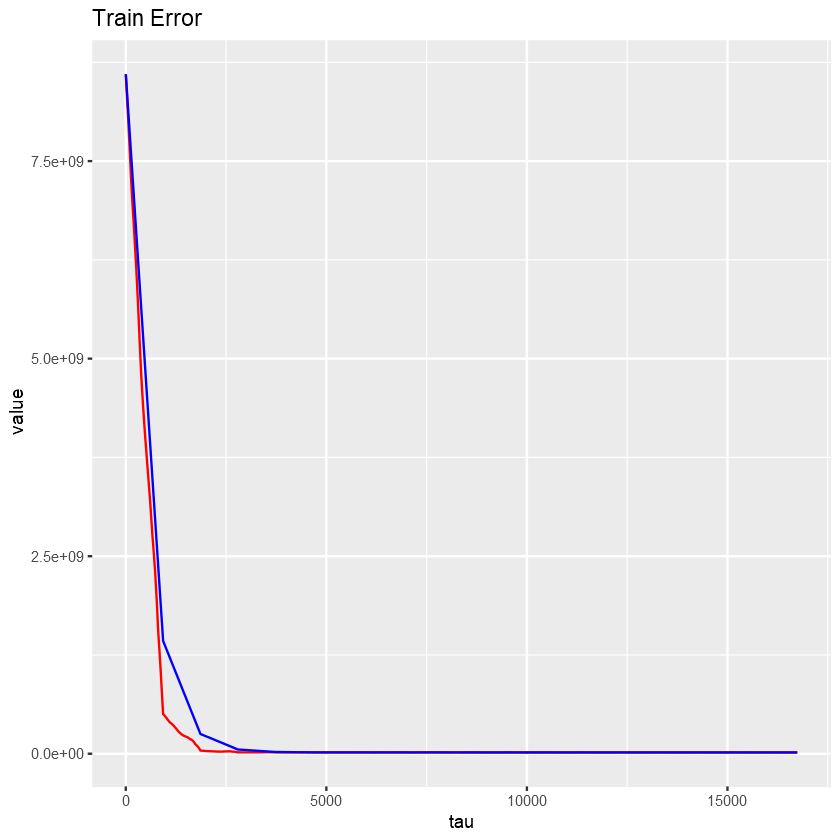

In [8]:
library(ggplot2)

# plotting the graph
ggplot() +
geom_line(data=error_sgd.m, aes(x=tau, y=value), color = 'red') +
geom_line(data=error_bgd.m, aes(x=tau, y=value), color = 'blue') + 
ggtitle('Test Error') 

The scale of y is really large, we will zoom in to better observe the difference between BGD and SGD.

Warning message:
"Removed 1778 rows containing missing values (geom_path)."Warning message:
"Removed 3 rows containing missing values (geom_path)."

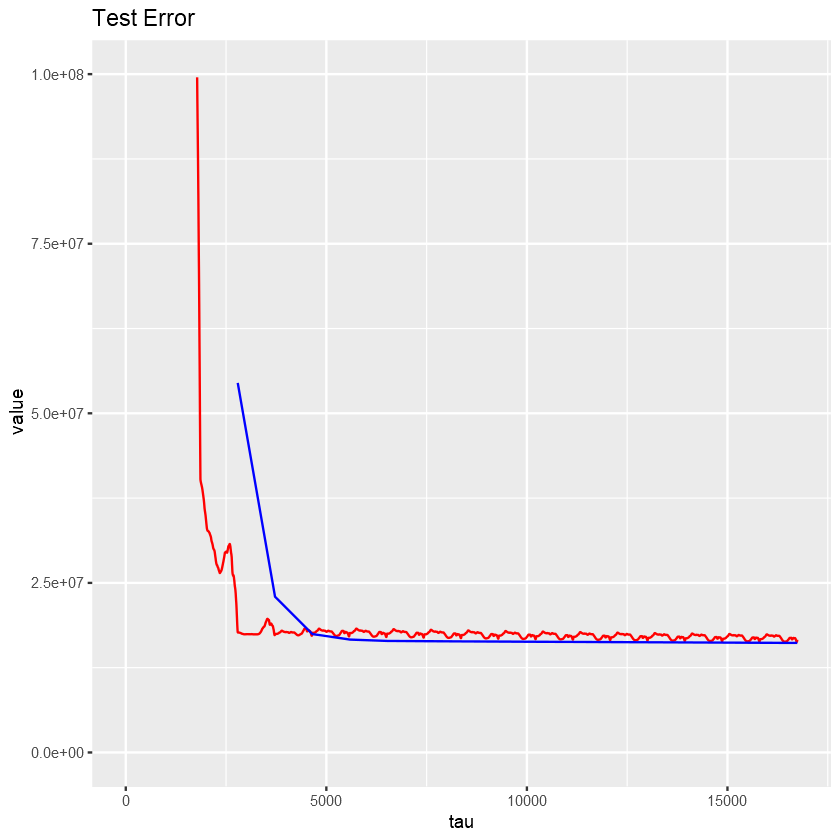

In [10]:
# plotting the graph
ggplot() +
geom_line(data=error_sgd.m, aes(x=tau, y=value), color = 'red') +
geom_line(data=error_bgd.m, aes(x=tau, y=value), color = 'blue') + 
ggtitle('Test Error') +
ylim(0,100000000)

The blue line is the error for batch gradient descent while the red line is the error for stochastic gradient descent.

The convergence speed is basically the same for batch gradient descent and stochastic gradient descent. However, it is obvious that there is much more noise for stochastic gradient descent during the convergence, this is because SGD uses only 1 data point to update the weight for each iteration while BGD uses all data points to update the weight for each iteration.